### 1. 머신러닝 기초 시작

In [1]:
# !pip install scikit-learn

In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 예시 : 몸무게와 키
weights = [87, 81, 82, 92, 90, 61, 86, 66, 69, 69]
heights = [187, 174, 179,192,188,160,179,168,168,174]

In [4]:
# dictionary 형태로 데이터 생성
body_df = pd.DataFrame({'heights': heights,'weights': weights})
body_df.head()

,heights,weights
0,187,87
1,174,81
2,179,82
3,192,92
4,188,90


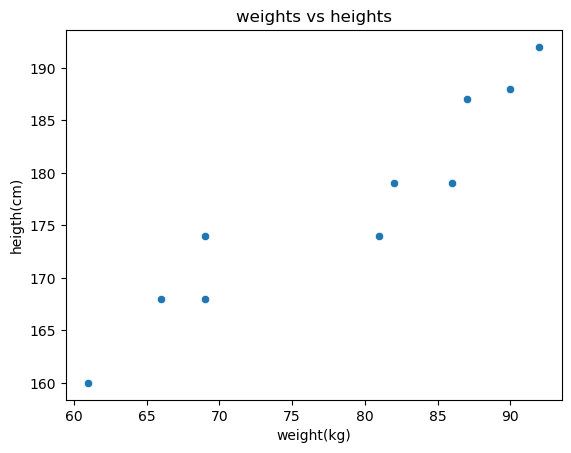

In [5]:
# weight과 height의 산점도(scatter plot)
sns.scatterplot(data = body_df, x = 'weights', y = 'heights')
plt.title('weights vs heights')
plt.xlabel('weight(kg)')
plt.ylabel('heigth(cm)')
plt.show()

In [6]:
# 선형회귀 훈련(적합)
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
type(model_lr)

sklearn.linear_model._base.LinearRegression

In [7]:
# DataFrame[] : Series
# DataFrame[[]] : DataFrame
x = body_df[['weights']]
y = body_df[['heights']]
print(x.head())
print(y.head())

   weights
0       87
1       81
2       82
3       92
4       90
   heights
0      187
1      174
2      179
3      192
4      188


In [8]:
# 데이터 훈련() 참고로 x는 대문자
model_lr.fit(X = x, y = y)

LinearRegression()

In [9]:
# 가중치(w1)
print(model_lr.coef_)
# 편향(bias, w0)
print(model_lr.intercept_)

[[0.86251245]]
[109.36527488]


In [10]:
w1 = model_lr.coef_[0][0]
w0 = model_lr.intercept_[0]

In [11]:
print( 'y= {}x + {}'.format(w1.round(2),w0.round(2)))

y= 0.86x + 109.37


y(height)은 x(몸무게)dp 0.86을 곱한 뒤 109.37을 더하면 된다.

> 서칭할 때
1. 구글링 -> 블로그
- 단점은 늘 블로그가 바뀌고 형태가 일정하지 않음

2. chatgpt LLM
- 단점은 의존하게되면 더이상 공부를 안하게 된다. 거짓 정보를 전달하는 경우

3. 공식문서
- 장점은 일괄되게 정리되어있어서 동일한 위치에 같은
- 자격증 : 공식문서만 열람할 수 있음
- 단점 : 초보자에게 어려움

In [12]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experime

- y = 0.86x + 109.37
- 활용하여 예측 컬럼 추가
- 에러값을 각각 계산(error)
- 양수를 만들기위해 제곱
- 모두 더할 예정(MSE)

In [13]:
# 예측값 만들기
body_df['pred'] = w1*body_df['weights'] + w0
body_df.head(3)

,heights,weights,pred
0,187,87,184.403858
1,174,81,179.228784
2,179,82,180.091296


In [14]:
# 에러값 만들기
body_df['error'] = body_df['heights'] - body_df['pred']
body_df.head()

,heights,weights,pred,error
0,187,87,184.403858,2.596142
1,174,81,179.228784,-5.228784
2,179,82,180.091296,-1.091296
3,192,92,188.716421,3.283579
4,188,90,186.991396,1.008604


In [15]:
body_df['error^2'] = body_df['error']*body_df['error']
body_df.head()

,heights,weights,pred,error,error^2
0,187,87,184.403858,2.596142,6.739951
1,174,81,179.228784,-5.228784,27.340178
2,179,82,180.091296,-1.091296,1.190927
3,192,92,188.716421,3.283579,10.781894
4,188,90,186.991396,1.008604,1.017283


In [16]:
# MSE계산
body_df['error^2'].sum()/len(body_df)

10.152939045376318

- 산점도 그래프에 선형식을 만들어 그래프로 그리기

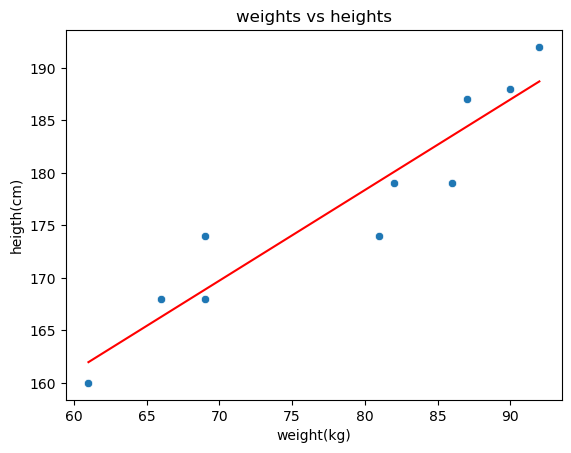

In [17]:
# weight과 height의 산점도(scatter plot)
sns.scatterplot(data = body_df, x = 'weights', y = 'heights')
sns.lineplot(data = body_df, x = 'weights', y = 'pred', color = 'red')
plt.title('weights vs heights')
plt.xlabel('weight(kg)')
plt.ylabel('heigth(cm)')
plt.show()

- 선형회귀 모델 평가
    - 회귀(숫자를 맞추는 방법) : MSE(수동계싼은 10)
    - R Square 값이 : 평균대비 설명력, 0이면 제일 낮음 1일수록 높음
    

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
# 평가함수는 공통적으로 정답 : 실제 (true) 예측값(pred)
y_true = body_df['heights']
y_pred = body_df['pred']
print(mean_squared_error(y_true,y_pred))
print(r2_score(y_true,y_pred))

10.152939045376318
0.8899887415172141


In [20]:
y_pred2 = model_lr.predict(body_df[['heights']])
y_pred2

c:\Users\and_c\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- heights
Feature names seen at fit time, yet now missing:
- weights

  warnings.warn(message, FutureWarning)


array([[270.6551037 ],
       [259.44244181],
       [263.75500408],
       [274.96766597],
       [271.51761616],
       [247.36726746],
       [263.75500408],
       [254.26736709],
       [254.26736709],
       [259.44244181]])

In [21]:
mean_squared_error(y_true, y_pred2)

10.152939045376318

- seaborn 시각화 라이브러리는 기본적으로 데이터셋을 제공

In [22]:
tips_df = sns.load_dataset('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
# x: total_bill y : tip
from sklearn.linear_model import LinearRegression
model_lr2 = LinearRegression()

In [24]:
x = tips_df[['total_bill']]
y = tips_df[['tip']]
model_lr2.fit(x,y)

LinearRegression()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

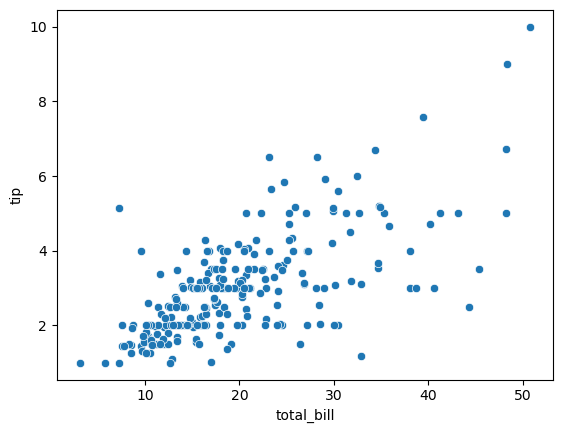

In [25]:
sns.scatterplot(data = tips_df, x = 'total_bill', y = 'tip')

In [26]:
# y(tip) = w1*x(total_bill)+w0
w1_tip = model_lr2.coef_[0][0]
w0_tip = model_lr2.intercept_[0]

In [27]:
# 방정식 만들기
print('y = {}x + {}'.format(w1_tip.round(2),w0_tip.round(2)))

y = 0.11x + 0.92


In [42]:
# 예측값 생성
y_true_tip = tips_df['tip']
y_pred_tip = model_lr2.predict(tips_df[['total_bill']])

In [29]:
y_pred_tip[:5]

array([[2.70463616],
       [2.00622312],
       [3.12683472],
       [3.40725019],
       [3.5028225 ]])

In [30]:
mean_squared_error(y_true_tip, y_pred_tip)

1.036019442011377

In [31]:
r2_score(y_true_tip,y_pred_tip)


0.45661658635167657

In [32]:
tips_df['pred'] = y_pred_tip
tips_df.head(3)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

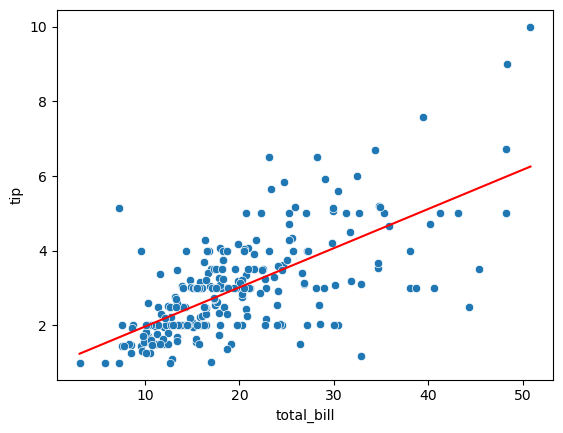

In [33]:
sns.scatterplot(data = tips_df, x = 'total_bill', y = 'tip')
sns.lineplot(data = tips_df, x = 'total_bill' , y ='pred', color = 'red')

In [34]:
# r2_score가 낮은 값 -> 올리기 위해 변수를 추가하는 방안

- 선형회귀
    - 단순선형회귀 : x변수가 1개
    - 다중선형회귀 : x변수가 여러개
    

# 범주형 데이터 사용하기
- 함수를 쓸수도 sklearn에서 제공하는 함수를 쓸 수 있다

In [35]:
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,pred
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835


In [36]:
# female 0 male 1
def get_sex(x):
    if x == 'female':
        return 0
    else :
        return 1 

In [37]:
# apply method는 매 행을 특정한 함수를 적용한다
tips_df['sex_en'] = tips_df['sex'].apply(get_sex)
tips_df.head(3)

,total_bill,tip,sex,smoker,day,time,size,pred,sex_en
0,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,1
1,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,1
2,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,1


In [38]:
# 모델 설계도 가져오기 LinearRegression
# 학습 fit, predict
# 평가 maen_sqaure_ r2_Score
model_lr3 = LinearRegression()
X = tips_df[['total_bill','sex_en']]
y = tips_df[['tip']]
model_lr3.fit(X,y)


LinearRegression()

In [39]:
y_pred_tip2 = model_lr3.predict(x)
y_pred_tip2[:3]

array([[2.70463616],
       [2.00622312],
       [3.12683472]])

In [40]:
# 단순선형회귀 mse : x변수 - total_bill
# 다중선형회귀 mse : x변수 - total_bill, sex_en
# 결과를 보니 큰 차이가 없음 
print('단순선형회귀 mse', mean_squared_error(y_true_tip, y_pred_tip))
print('다중선형회귀 mse', mean_squared_error(y_true_tip, y_pred_tip2))
print('단순선형회귀 r2', r2_score(y_true_tip, y_pred_tip))
print('다중선형회귀 r2', r2_score(y_true_tip, y_pred_tip2))

단순선형회귀 mse 1.036019442011377
다중선형회귀 mse 1.036019442011377
단순선형회귀 r2 0.45661658635167657
다중선형회귀 r2 0.45661658635167657


<AxesSubplot:xlabel='sex', ylabel='tip'>

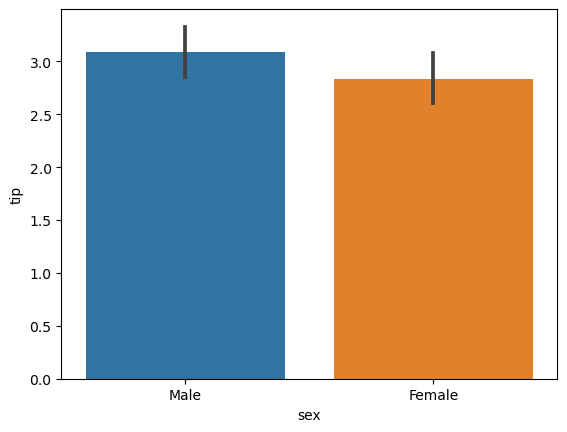

In [41]:
# 데이터가 부족한 한계
# 데이터 전처리 데이터 확인이 없이 뇌피셜로 한 한계
sns.barplot(data = tips_df, x = 'sex', y = 'tip')
# 데이터 확인시 남녀간 큰 차이가 없음을 알 수 있음, 단순히 이해를 위해 위 과정을 거침

In [ ]:
# 행렬과 선형대수 공부 필요


In [ ]:
# tips 데이터 가지고 다양한 변수 넣고 뺴면서 가장 높은 r2_score를 만들어보기